In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import matplotlib.pyplot as plt

In [4]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np

In [6]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import pandas as pd

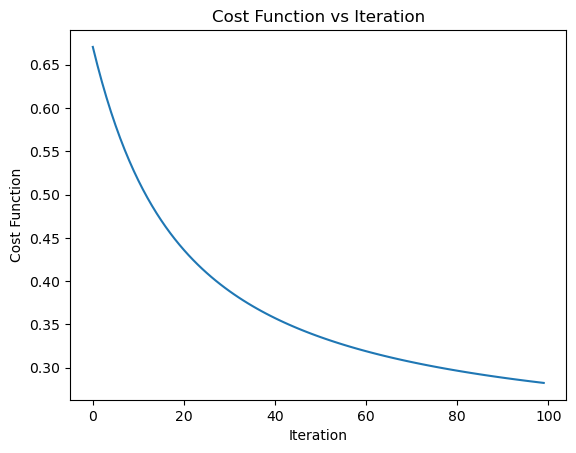

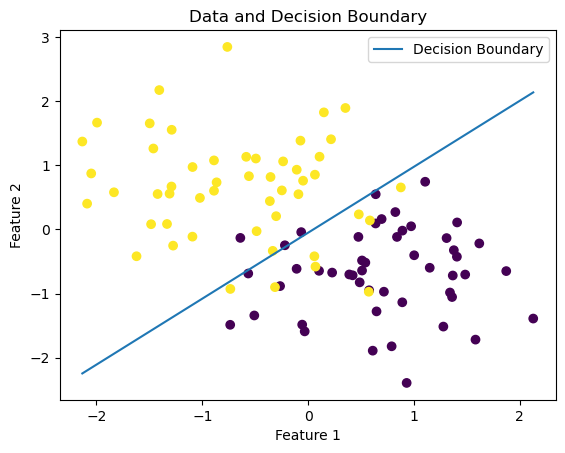

Confusion Matrix: 
[[46  3]
 [ 8 42]]
Accuracy: 0.8888888888888888
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load data
X = pd.read_csv('logisticX.csv')
y = pd.read_csv('logisticY.csv').values.flatten()

# Normalize X
X = (X - X.mean()) / X.std()

# Add intercept
X['intercept'] = 1
X = X.reindex(columns=sorted(X.columns, reverse=True))

# Initialize parameters
theta = np.zeros(X.shape[1])

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    return (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    
    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))
        theta = theta - (alpha/m) * (X.T @ (h - y))
        J_history.append(cost_function(X, y, theta))
    
    return theta, J_history

# Train model
alpha = 0.1
num_iters = 100
theta, J_history = gradient_descent(X, y, theta, alpha, num_iters)

# Plot cost function vs iteration
plt.plot(range(num_iters), J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost Function')
plt.title('Cost Function vs Iteration')
plt.show()

# Plot data and decision boundary
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y)
x_values = np.array([np.min(X.iloc[:, 1]), np.max(X.iloc[:, 1])])
y_values = - (theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data and Decision Boundary')
plt.legend()
plt.show()

# Predictions
y_pred = sigmoid(np.dot(X, theta)) >= 0.5

# Confusion matrix
cm = confusion_matrix(y, y_pred)

# Accuracy, precision, recall, F1-score
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Confusion Matrix: \n{cm}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
